In [1]:
from models import Kmeans
from models.utils import strategies, Strategy
import pandas as pd
from models.metrics import Metric, Average
from models.model_selection import PlotType, plot, heatmaps, train_test_split, evaluate, evaluate_by_class\
    , grid_search_cv, kmeans_elbow
from typing import get_args
from pprint import pprint
import seaborn as sns

sns.set_theme(style="whitegrid")

# Load data

In [2]:
df = pd.read_csv('../data/processed_dataset1.csv')
df

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,-1.551804,-0.091098,0.521393,-0.066513,0.535760,0.366969,-0.322992,-1.155578,-1.437858,-0.389002,0.066270,-1.616350,0.366969,0.0
1,-0.514221,-0.466324,-1.354331,0.682937,1.459280,1.579355,0.361963,-0.651246,-1.227329,1.281175,-1.424239,0.926065,1.579355,0.0
2,-1.205943,0.250017,1.856369,0.542415,-0.245679,1.747741,0.050446,-0.651246,-1.227329,1.346247,-1.472898,0.926065,1.747741,0.0
3,-1.288950,-0.705105,-0.196789,0.776619,0.251601,1.175226,0.361963,-0.315025,-1.349819,1.259485,-1.485703,0.926065,1.175226,0.0
4,0.274342,0.352352,-0.458715,0.729778,-1.027119,0.905807,2.163555,-1.071523,-1.265607,1.606534,-1.542045,0.926065,0.905807,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1.394931,0.625244,1.053694,2.275519,-0.245679,-1.013802,0.241749,-0.146914,0.238713,-0.562527,0.660424,1.480647,-1.013802,1.0
874,0.191335,0.045348,-0.103848,-1.097006,-0.529839,-1.653672,-1.157460,-0.230970,1.605233,-1.083102,-0.120684,-0.067852,-1.653672,1.0
875,0.357348,0.113571,-1.083956,0.682937,0.535760,-0.340255,-0.011120,0.357418,-0.189999,-0.692671,-0.504836,-0.495024,-0.340255,1.0
876,0.966063,1.682700,-0.906523,-0.441238,0.748880,1.613032,-0.521073,1.702303,0.196607,0.153263,1.228969,0.626303,1.613032,2.0


In [3]:
target_column = 'Fertility'

In [4]:
Y = df[target_column]
X = df.drop(target_column, axis=1)

In [5]:
# for current_type in PlotType:
#     plot(X, plot_type=current_type)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(702, 13) (176, 13) (702,) (176,)


# 1. Kmeans

100%|██████████| 5/5 [00:19<00:00,  3.83s/it]


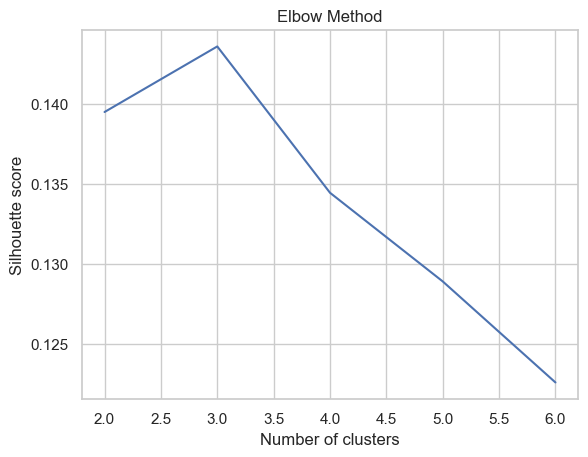

In [7]:
kmeans_elbow(X.to_numpy(), k_range=range(2, 7), strategy='manhattan')

- we can see that the best number of clusters is 3

In [8]:
kmeans = Kmeans(n_clusters=3, max_iter=100)

In [9]:
kmeans.fit(X_train.to_numpy())
kmeans.labels_

array([0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0,
       0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 1,
       0, 2, 1, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0,
       2, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 0,
       1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 1, 1, 2, 0,
       0, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0,
       0, 1, 2, 0, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2,
       1, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 2,
       0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1,
       2, 1, 1, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1,
       1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1,
       0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 2, 1, 2, 1, 0,

In [10]:
kmeans.predict(X_test.to_numpy())

array([0., 0., 2., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 2., 1., 1., 0.,
       2., 0., 2., 0., 0., 1., 0., 2., 0., 1., 1., 2., 0., 2., 0., 1., 1.,
       0., 2., 1., 0., 0., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1.,
       2., 2., 0., 1., 1., 0., 0., 2., 0., 2., 0., 2., 2., 0., 0., 0., 0.,
       0., 2., 2., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 2., 0., 1., 0., 2., 1., 1., 0., 1., 2., 0., 2., 1., 2.,
       0., 0., 0., 0., 1., 0., 2., 2., 1., 0., 2., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 2., 1., 2., 1., 1., 1., 2., 2., 2., 2., 1., 0., 0., 1.,
       2., 1., 2., 0., 2., 2., 0., 2., 0., 0., 2., 0., 1., 0., 1., 1., 1.,
       2., 2., 1., 1., 2., 2., 2., 0., 2., 0., 2., 1., 0., 0., 2., 2., 0.,
       2., 1., 1., 0., 1., 0.])

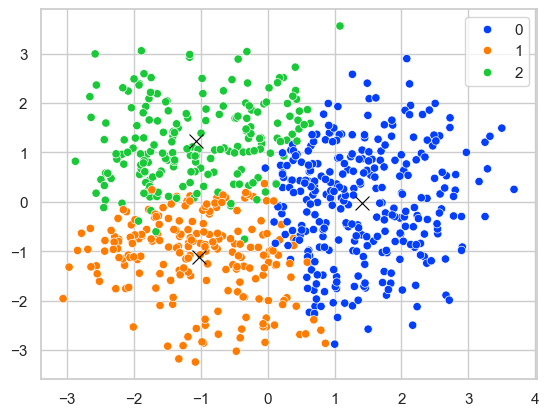

In [11]:
kmeans.plot(X_train.to_numpy())

In [16]:
models = [Kmeans(n_clusters=7, max_iter=100, func=strategy) for strategy in strategies]
models

[Kmeans(n_clusters=7, func=euclidean_distance, random_state=None, max_iter=100),
 Kmeans(n_clusters=7, func=manhattan_distance, random_state=None, max_iter=100),
 Kmeans(n_clusters=7, func=minkowski_distance, random_state=None, max_iter=100),
 Kmeans(n_clusters=7, func=cosine_distance, random_state=None, max_iter=100),
 Kmeans(n_clusters=7, func=hamming_distance, random_state=None, max_iter=100)]

In [17]:
averages = list(get_args(Average))
averages.remove('binary')
averages

['macro', 'micro', 'weighted']

In [18]:
pred = kmeans.predict(X_test.to_numpy())

print(f'accuracy: {(pred == Y_test.to_numpy()).sum() / len(pred)}')

accuracy: 0.3465909090909091


In [19]:
evaluate(X_train.to_numpy(), Y_train.to_numpy(), X_test.to_numpy(), Y_test.to_numpy(), models, get_args(Metric), averages)

,model,accuracy,precision_(macro),precision_(micro),precision_(weighted),recall_(macro),recall_(micro),recall_(weighted),f1-score_(macro),f1-score_(micro),f1-score_(weighted),specificity_(macro),specificity_(micro),specificity_(weighted)
0,"Kmeans(n_clusters=7, func=euclidean_distance, ...",0.062500,0.131834,0.129412,0.206469,0.040259,0.062500,0.062500,0.061588,0.084291,0.095831,0.780310,0.789773,0.761386
1,"Kmeans(n_clusters=7, func=manhattan_distance, ...",0.176136,0.367307,0.407895,0.391516,0.286599,0.176136,0.176136,0.279639,0.246032,0.221115,0.852206,0.872159,0.812299
2,"Kmeans(n_clusters=7, func=minkowski_distance, ...",0.102273,0.380435,0.295082,0.528780,0.071791,0.102273,0.102273,0.120188,0.151899,0.170508,0.880882,0.877841,0.886965
3,"Kmeans(n_clusters=7, func=cosine_distance, ran...",0.164773,0.335897,0.353659,0.466608,0.262106,0.164773,0.164773,0.206944,0.224806,0.230256,0.848775,0.849432,0.847460
4,"Kmeans(n_clusters=7, func=hamming_distance, ra...",0.420455,0.140152,0.420455,0.176782,0.333333,0.420455,0.420455,0.197333,0.420455,0.248909,0.666667,0.710227,0.579545
